In [143]:
# IMPORT NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [144]:
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [145]:
# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [146]:
df = pd.read_csv(r"C:\Users\HP\Downloads\twitter_training.csv",header =None)
df

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [147]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [149]:
df.columns

Index([0, 1, 2, 3], dtype='int64')

In [150]:
df.columns = ['id','entity','sentiment','text']

In [151]:
df.isnull().sum()

id             0
entity         0
sentiment      0
text         686
dtype: int64

In [152]:
# DROP UNNECESSARY COLUMNS 
df = df[["entity", "sentiment", "text"]]

In [153]:
# Convert sentiment labels to standardized format
df['sentiment'] = df['sentiment'].str.lower().replace({
    'positive':'Positive',
    'negative':'Negative',
    'neutral' : 'Neutral'
})

C:\Users\HP\AppData\Local\Temp\ipykernel_51132\3300212835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].str.lower().replace({


In [154]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


In [155]:
# Function to predict sentiment using VADER
def get_sentiment(text):
    score = sia.polarity_scores(text)
    return 'Positive' if score['compound'] > 0.05 else 'Negative' if score['compound'] < -0.05 else 'Neutral'

In [156]:
df['predicted_sentiment'] = df['text'].astype(str).apply(get_sentiment)
print(df.head())

        entity sentiment                                               text  \
0  Borderlands  Positive  im getting on borderlands and i will murder yo...   
1  Borderlands  Positive  I am coming to the borders and I will kill you...   
2  Borderlands  Positive  im getting on borderlands and i will kill you ...   
3  Borderlands  Positive  im coming on borderlands and i will murder you...   
4  Borderlands  Positive  im getting on borderlands 2 and i will murder ...   

  predicted_sentiment  
0            Negative  
1            Negative  
2            Negative  
3            Negative  
4            Negative  


VISUALIZATION

C:\Users\HP\AppData\Local\Temp\ipykernel_51132\1016586764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['predicted_sentiment'],palette="coolwarm")


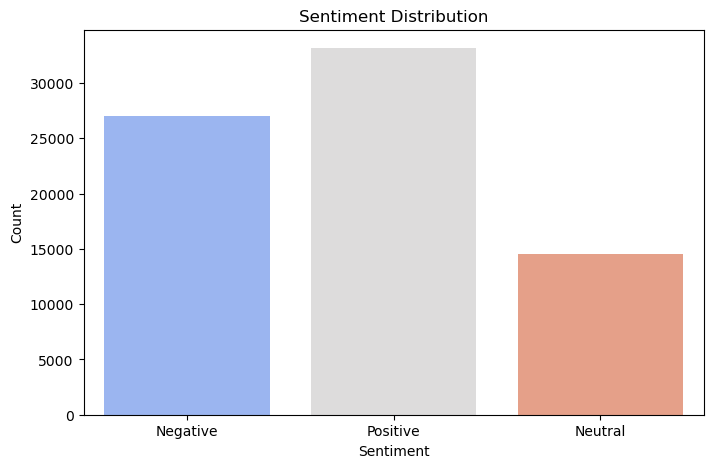

In [158]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['predicted_sentiment'],palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_wordcloud(sentiment):
    text = " ".join(df[df['predicted_sentiment'] == sentiment]['text'].dropna())

    if not text.strip():  # Check if there's no text
        print(f"No data available for {sentiment} sentiment.")
        return
    
    # Create word cloud inside the function
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.show()


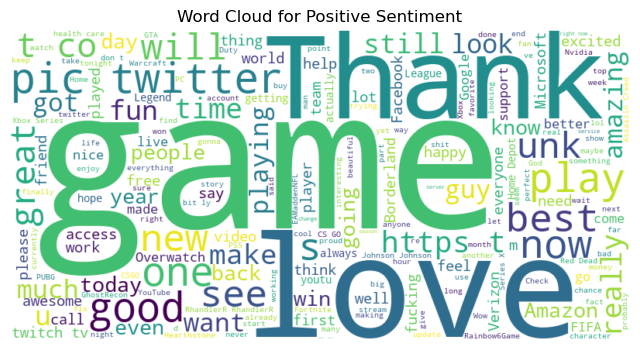

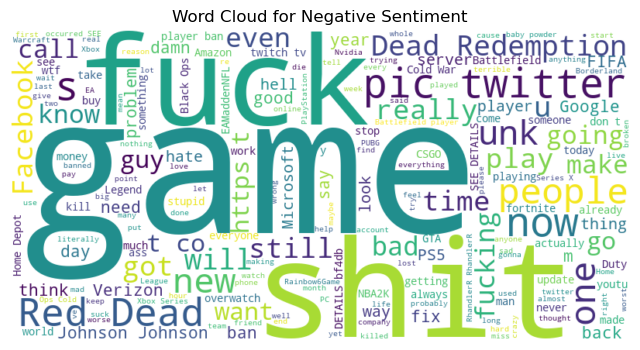

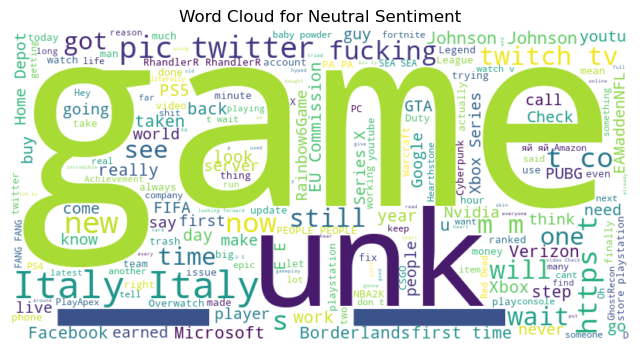

In [160]:
# Call function for each sentiment
for sentiment in ["Positive", "Negative", "Neutral"]:
    generate_wordcloud(sentiment)